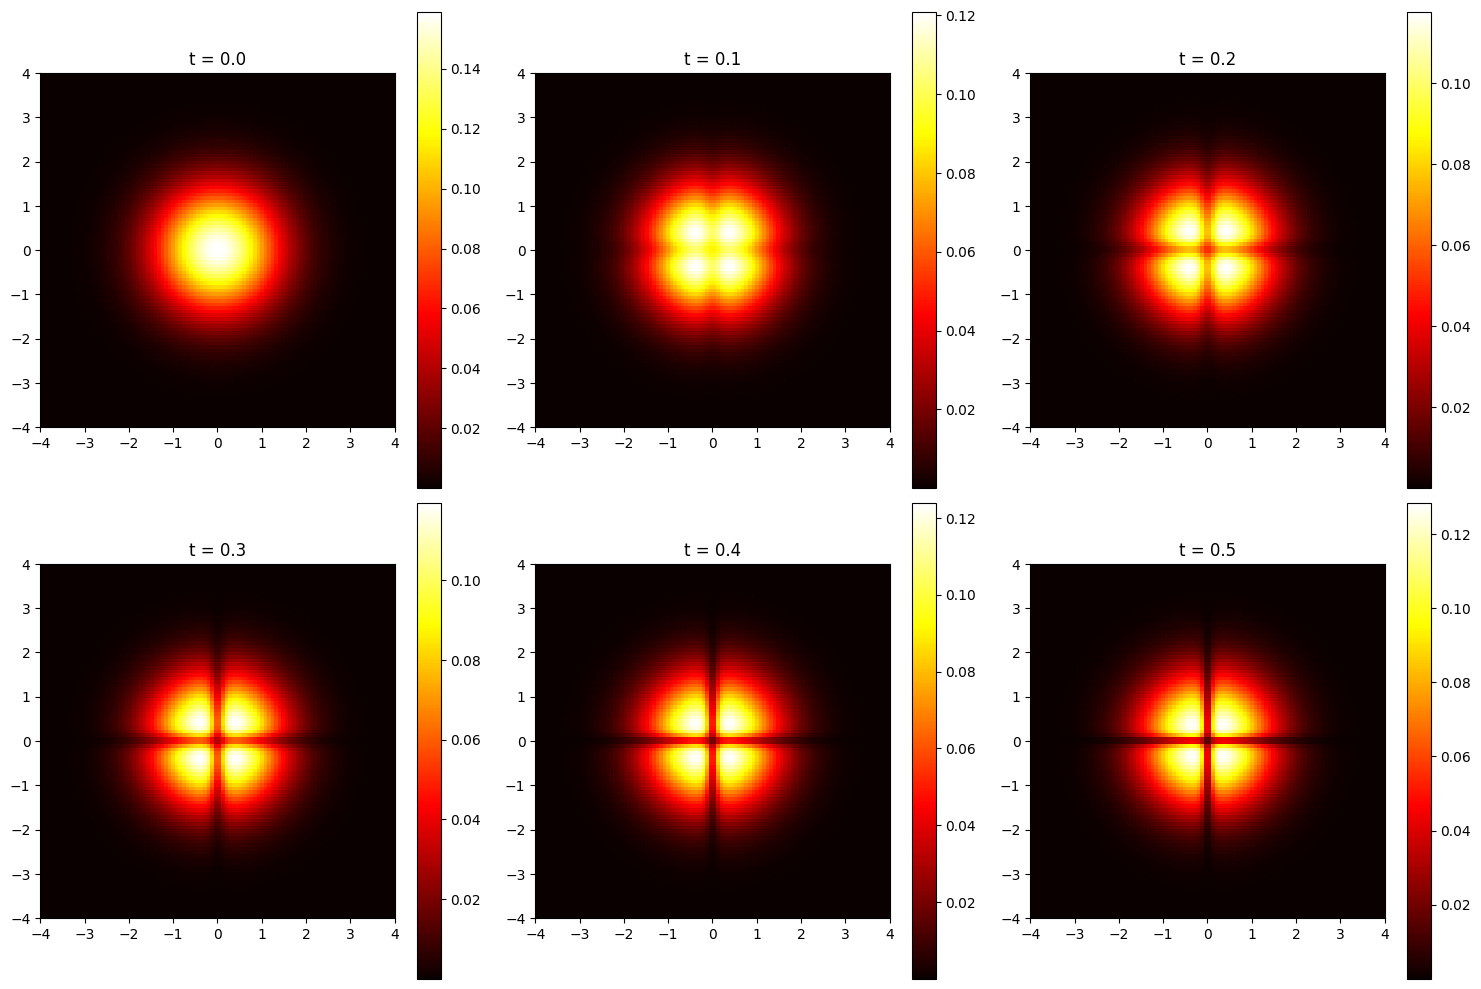

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


Z1, Z2 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
Z = np.vstack([Z1.ravel(), Z2.ravel()])


def initial_density(Z):
    return (1 / (2 * np.pi)) * np.exp(-0.5 * (Z[0]**2 + Z[1]**2))

def dynamics(t, Z):
    Z = Z.reshape(2, -1)
    dZdt = [np.tanh(3 * Z[0]), np.tanh(3 * Z[1])]
    return np.vstack(dZdt).ravel()


def compute_density_at_time(t):
    sol = solve_ivp(dynamics, [0, t], Z.flatten(), method='RK45')
    Z_t = sol.y[:, -1].reshape(2, -1)  # Reshape solution back to 2D
    log_p_t = np.log(initial_density(Z)) - 3 * t * (1 - np.tanh(3 * Z_t[0])**2 + 1 - np.tanh(3 * Z_t[1])**2)
    return np.exp(log_p_t).reshape(100, 100)


times = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, t in enumerate(times):
    density = compute_density_at_time(t)
    ax = axes[i // 3, i % 3]
    heatmap = ax.imshow(density, extent=[-4, 4, -4, 4], origin='lower', cmap='hot')
    ax.set_title(f't = {t}')
    fig.colorbar(heatmap, ax=ax)

plt.tight_layout()
plt.show()
